In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D

In [5]:
main_dir = "./Dataset"
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

train_covid_dir = os.path.join(train_dir, "COVID")
train_normal_dir = os.path.join(train_dir, "non-COVID")

test_covid_dir = os.path.join(test_dir, "COVID")
test_normal_dir = os.path.join(test_dir, "non-COVID")


In [6]:
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

['./Dataset\\train\\COVID\\Covid (1).png', './Dataset\\train\\COVID\\Covid (10).png', './Dataset\\train\\COVID\\Covid (100).png', './Dataset\\train\\COVID\\Covid (1000).png', './Dataset\\train\\COVID\\Covid (1001).png', './Dataset\\train\\COVID\\Covid (1002).png', './Dataset\\train\\COVID\\Covid (1003).png', './Dataset\\train\\COVID\\Covid (1004).png']
['./Dataset\\train\\non-COVID\\Non-Covid (1).png', './Dataset\\train\\non-COVID\\Non-Covid (10).png', './Dataset\\train\\non-COVID\\Non-Covid (100).png', './Dataset\\train\\non-COVID\\Non-Covid (1000).png', './Dataset\\train\\non-COVID\\Non-Covid (1001).png', './Dataset\\train\\non-COVID\\Non-Covid (1002).png', './Dataset\\train\\non-COVID\\Non-Covid (1003).png', './Dataset\\train\\non-COVID\\Non-Covid (1004).png']


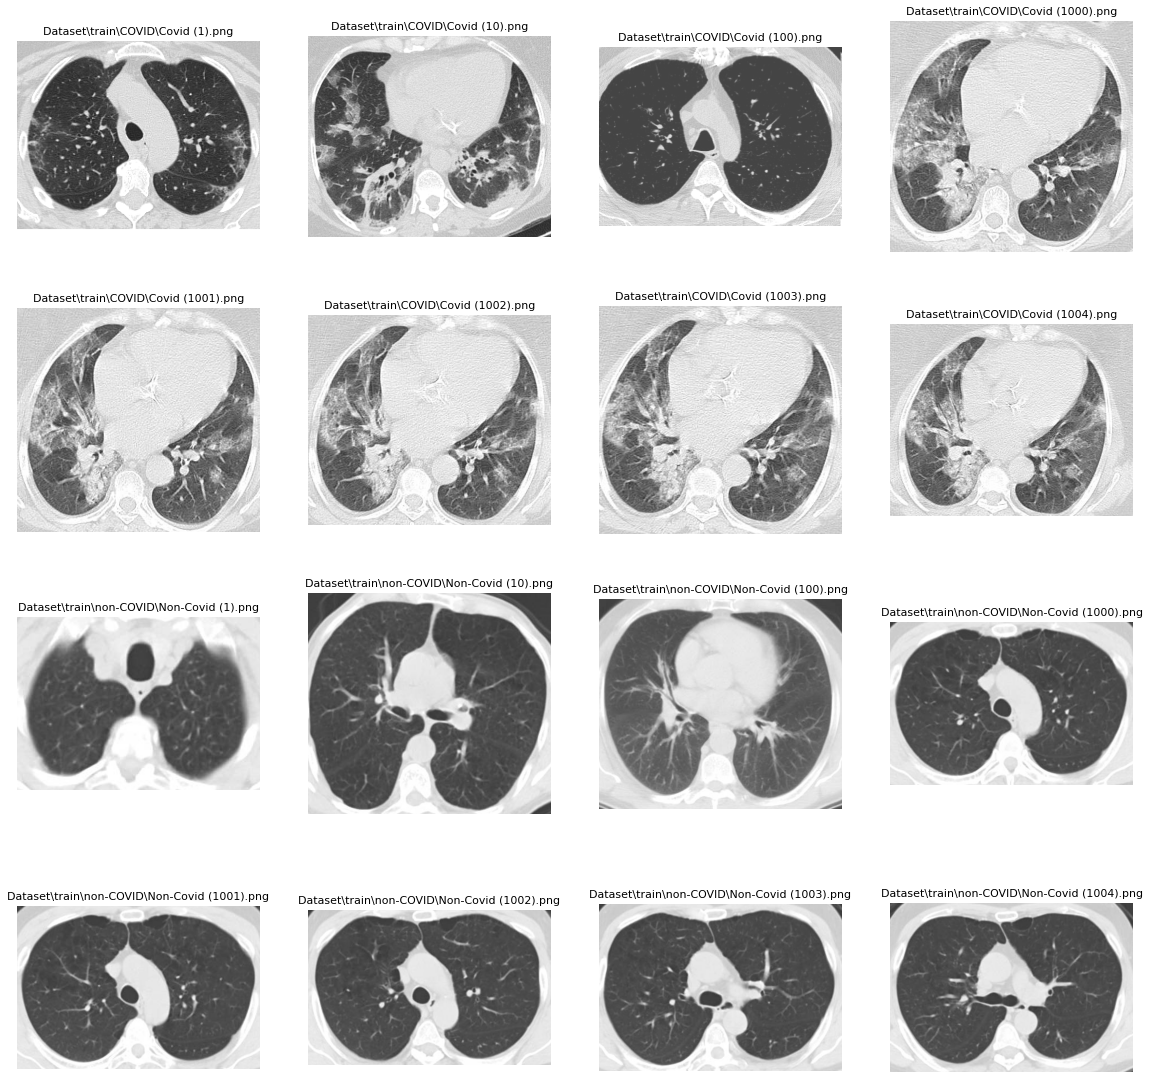

In [7]:
rows = 4
columns = 4
fig = plt.gcf()
fig.set_size_inches(20,20)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 1)[1]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

In [8]:
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")

Found 1986 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 2481 images belonging to 2 classes.


In [9]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID': 0, 'non-COVID': 1}
Image shape is :  (150, 150, 3)


In [10]:
model = Sequential()
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [11]:
model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_generator, 
                    epochs = 10, 
                    validation_data = validation_generator)

Epoch 1/10
63/63 [==============================] - 320s 5s/step - loss: 0.6934 - accuracy: 0.4965 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 2/10
63/63 [==============================] - 366s 6s/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6930 - val_accuracy: 0.5071
Epoch 3/10
63/63 [==============================] - 356s 6s/step - loss: 0.6933 - accuracy: 0.5136 - val_loss: 0.6930 - val_accuracy: 0.5111
Epoch 4/10
63/63 [==============================] - 366s 6s/step - loss: 0.6929 - accuracy: 0.5015 - val_loss: 0.6926 - val_accuracy: 0.5131
Epoch 5/10
63/63 [==============================] - 373s 6s/step - loss: 0.6931 - accuracy: 0.4768 - val_loss: 0.6928 - val_accuracy: 0.5071
Epoch 6/10
63/63 [==============================] - 338s 5s/step - loss: 0.6928 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.4949
Epoch 7/10
63/63 [==============================] - 400s 6s/step - loss: 0.6931 - accuracy: 0.5111 - val_loss: 0.6930 - val_accuracy: 0.5071
Epoch 8/10
63

In [14]:
model_json = model.to_json()
with open(r"./Model/lung_model.json", "w") as json_file:
    json_file.write(model_json)